# Praca domowa 5
**Piotr Marciniak**
## Wczytanie danych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

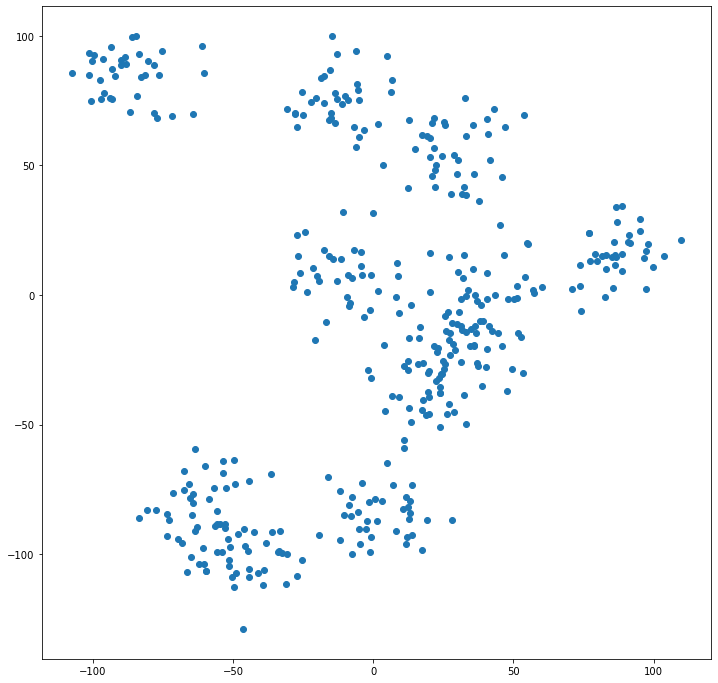

In [2]:
X = np.genfromtxt("../../clustering.csv", delimiter=",")
plt.figure(figsize=(12, 12))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Pierwsza metoda - k-means

Do wyboru odpowiedniej liczby klastrów w tym przypadku użyjemy metody *Silhouette'a*.

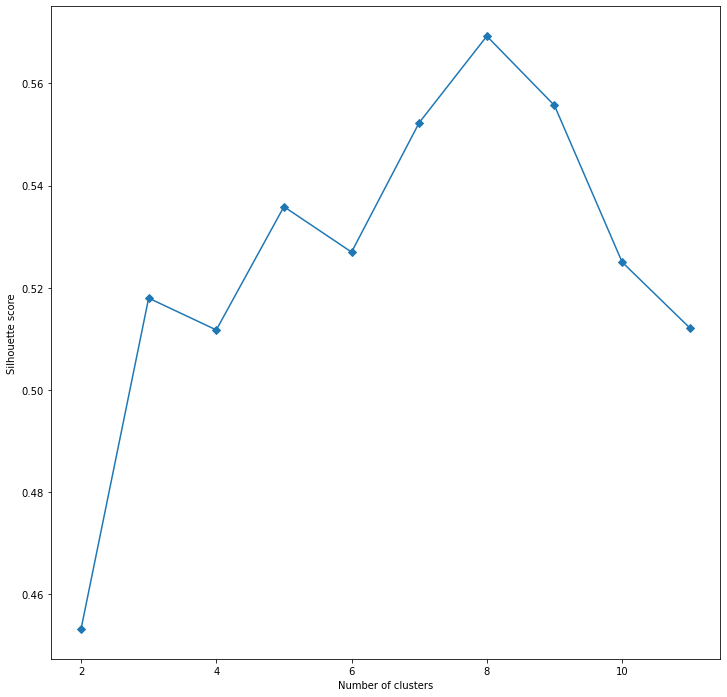

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def count_clustering_scores(X, cluster_numbers, model, score_fun):        
    scores = []  
    
    for k in cluster_numbers:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    return scores

cluster_numbers = range(2, 12)
silhouette = count_clustering_scores(X, cluster_numbers, KMeans, silhouette_score)

plt.figure(figsize=(12,12))
plt.ylabel("Silhouette score")
plt.xlabel("Number of clusters")
plt.plot(cluster_numbers, silhouette, 'D-')
plt.show()

Jak widzimy z wykresu najlepszy wynik osiągamy dla 8 klastrów.

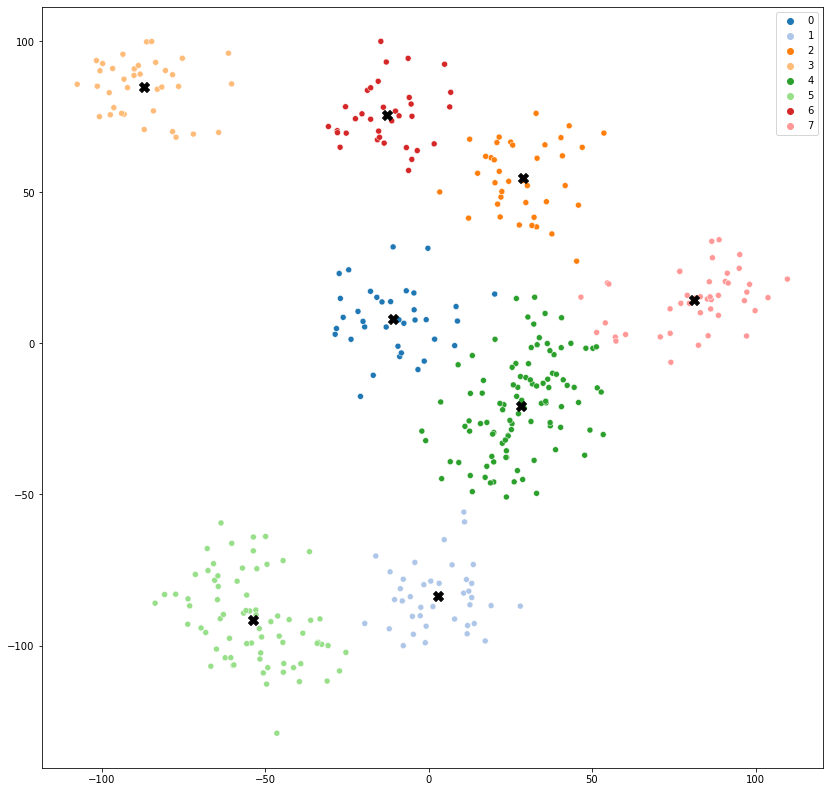

In [4]:
def plot_clusters(model, X, center=True):
    cluster = model.fit_predict(X)

    plt.figure(figsize=(14,14))
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=cluster, palette="tab20")
    if center:
        plt.scatter(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:, 1], s=100, marker="X", c="black")
    plt.show()

plot_clusters(KMeans(n_clusters=8), X)

## Druga metoda - Agglomerative Clustering
Gdzie jako linkage ustawimy Warda. Do wyboru odpowiedniej liczby klastrów w tym przypadku użyjemy indeksu *Calińskiego-Harabasza*. Im wyższa wartość indeksu, tym lepszy podział na klastry.

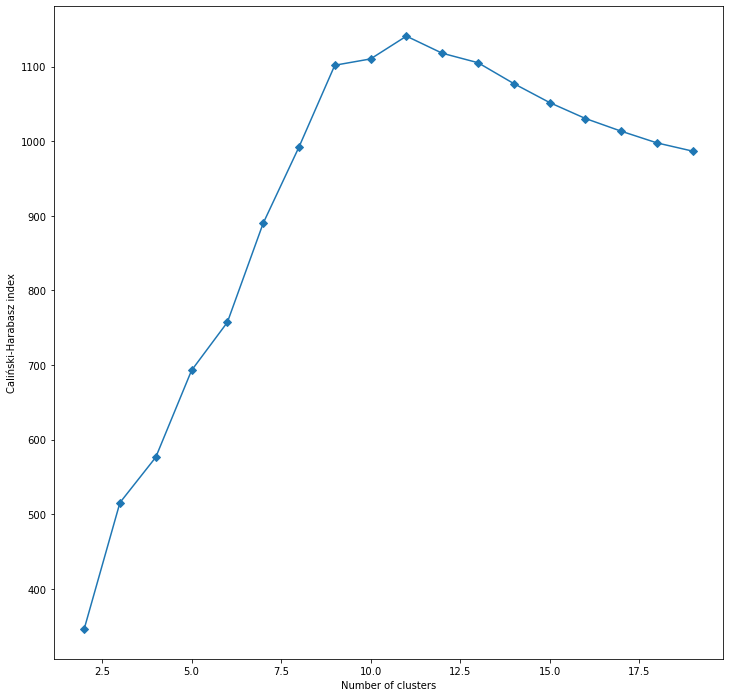

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
from functools import partial

cluster_numbers = range(2, 20)
cal_har_score = count_clustering_scores(X, cluster_numbers, 
                                        partial(AgglomerativeClustering, linkage='ward'),
                                        calinski_harabasz_score)
plt.figure(figsize=(12,12))
plt.ylabel("Caliński-Harabasz index")
plt.xlabel("Number of clusters")
plt.plot(cluster_numbers, cal_har_score, 'D-')
plt.show()

Z wykresu wynika, że podział na 11 klastrów daje nam najlepsze wyniki.

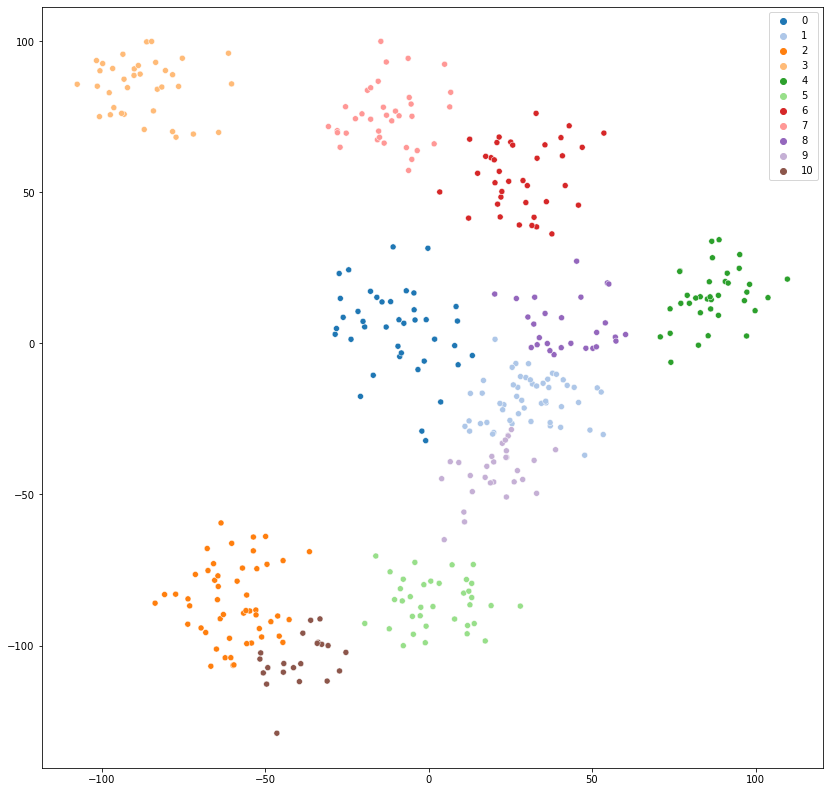

In [6]:
plot_clusters(AgglomerativeClustering(n_clusters=11, linkage='ward'), X, False)

## Ciekawość
Jeszcze w ramach ciekawości sprawdźmy, czy metryki w tym przypadku miały wpływ na podział klastrów, czy może metody zmieniały wartość metryk.

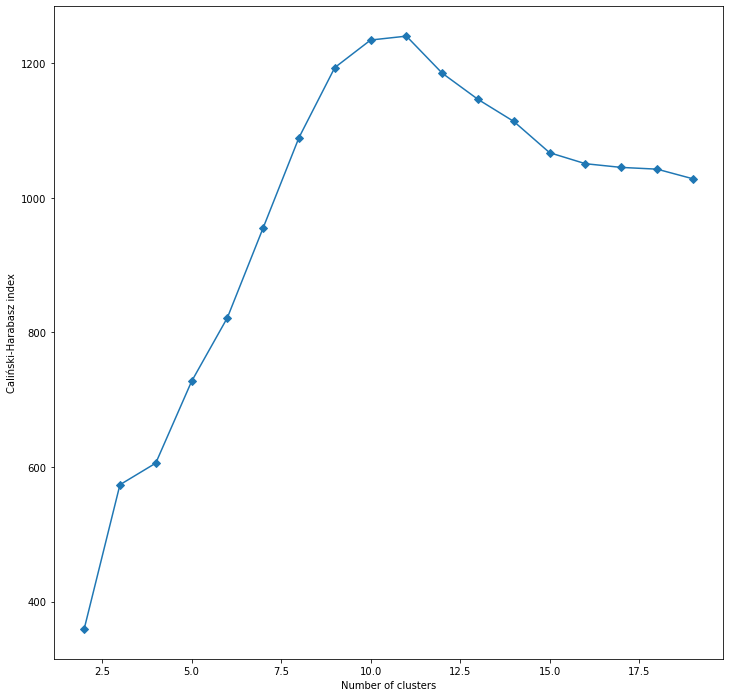

Liczba klastrów, dla której osiągneliśmy maksimum 11


In [7]:
cal_har_score = count_clustering_scores(X, cluster_numbers, 
                                        KMeans,
                                        calinski_harabasz_score)
plt.figure(figsize=(12,12))
plt.ylabel("Caliński-Harabasz index")
plt.xlabel("Number of clusters")
plt.plot(cluster_numbers, cal_har_score, 'D-')
plt.show()
print(f"Liczba klastrów, dla której osiągneliśmy maksimum {np.min(cluster_numbers)+np.argmax(cal_har_score)}")

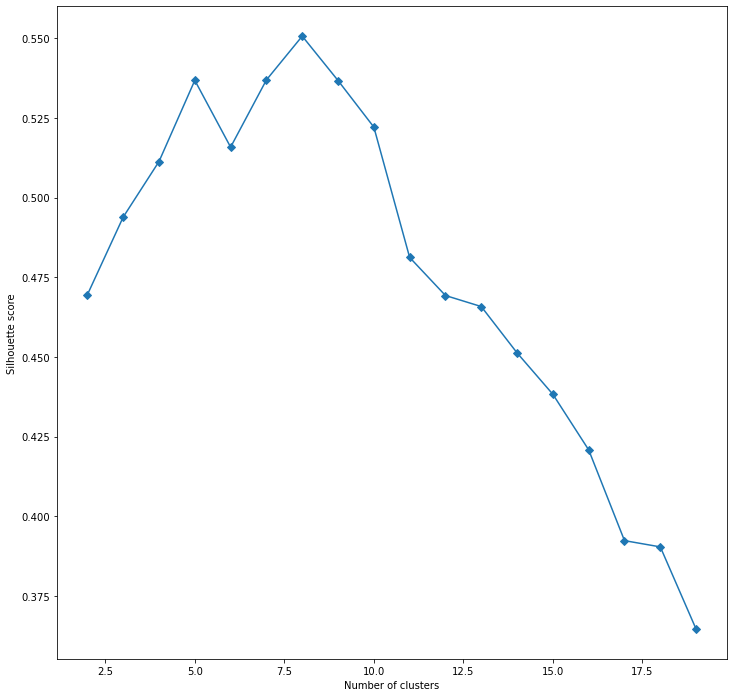

Liczba klastrów, dla której osiągneliśmy maksimum 8


In [8]:
silhouette = count_clustering_scores(X, cluster_numbers, partial(AgglomerativeClustering, linkage='ward'), silhouette_score)
plt.figure(figsize=(12,12))
plt.ylabel("Silhouette score")
plt.xlabel("Number of clusters")
plt.plot(cluster_numbers, silhouette, 'D-')
plt.show()
print(f"Liczba klastrów, dla której osiągneliśmy maksimum {np.min(cluster_numbers)+np.argmax(silhouette)}")

Widzimy, że metryki preferują podobne liczby klastrów dla różnych modeli (w naszym wyniku te same, ale wydaję mi się, że to może się zmienić, jak weźmiemy inny model), ale także dla tych samych metryk modele dają nam różne krzywe.